In [158]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from scipy.stats import norm
import yfinance as yf

In [159]:
#import the data
BTC = yf.Ticker("MANA-USD")

In [160]:
data = yf.download("MANA-USD", start="2017-12-31", end="2021-11-29")['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [161]:
data.head()

Date
2017-12-31    0.101999
2018-01-01    0.100121
2018-01-02    0.105317
2018-01-03    0.155900
2018-01-04    0.200037
Name: Adj Close, dtype: float64

In [162]:
data.tail()

Date
2021-11-25    5.479181
2021-11-26    4.639659
2021-11-27    4.703832
2021-11-28    5.113992
2021-11-29    4.881831
Name: Adj Close, dtype: float64

In [163]:
log_returns = np.log(1 + data.pct_change())

In [164]:
log_returns.tail()

Date
2021-11-25    0.226378
2021-11-26   -0.166315
2021-11-27    0.013737
2021-11-28    0.083603
2021-11-29   -0.046460
Name: Adj Close, dtype: float64

<AxesSubplot:xlabel='Date'>

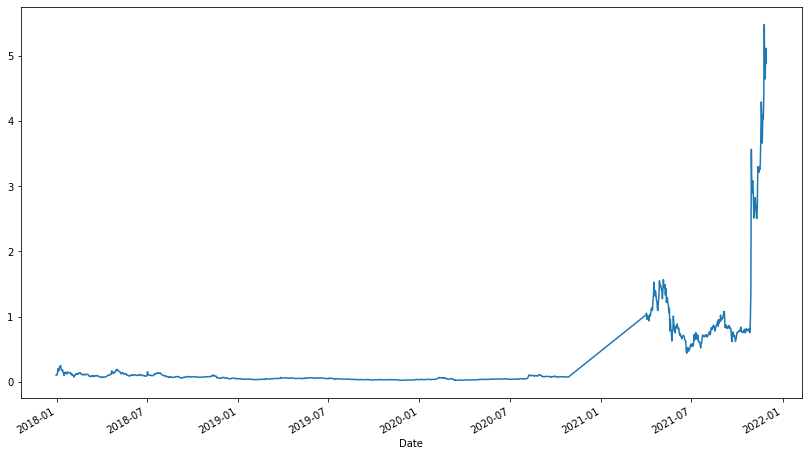

In [165]:
data.plot(figsize=(14,8))

<AxesSubplot:xlabel='Date'>

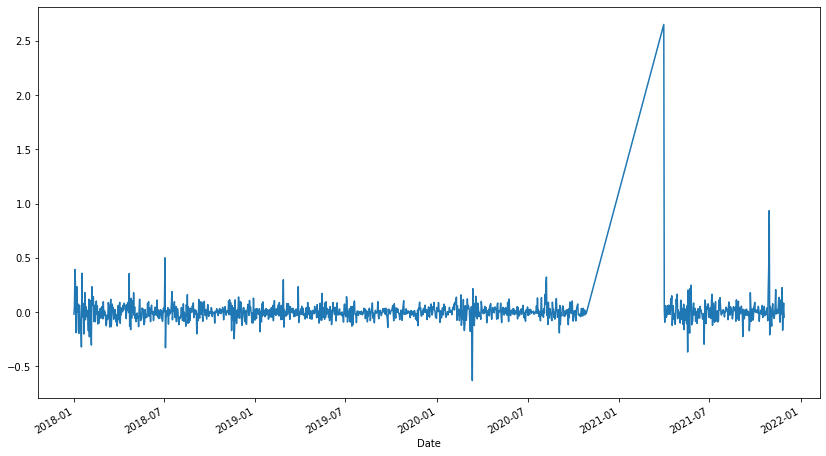

In [166]:
log_returns.plot(figsize=(14,8))

In [167]:
u = log_returns.mean()
u

0.0030459154815109333

In [168]:
var = log_returns.var()
var

0.011818521680403985

In [169]:
stdev = log_returns.std()
stdev

0.10871302442855679

In [170]:
drift = u - (0.5 * var)
drift

-0.0028633453586910593

In [171]:
np.array(drift)

array(-0.00286335)

In [172]:
np.array(stdev)

array(0.10871302)

In [173]:
#set up a 96% chance of occurance
norm.ppf(0.96)

1.7506860712521692

In [174]:
x = np.random.rand(10,2)
x

array([[0.99516357, 0.15834759],
       [0.12435584, 0.73216915],
       [0.45690797, 0.79908763],
       [0.37044167, 0.33358591],
       [0.12762791, 0.28874613],
       [0.76543958, 0.5632648 ],
       [0.34778528, 0.9837451 ],
       [0.68774169, 0.6150142 ],
       [0.24460497, 0.68956013],
       [0.55021983, 0.16281177]])

In [175]:
norm.ppf(x)

array([[ 2.58730967, -1.0012723 ],
       [-1.15348425,  0.61938662],
       [-0.10822662,  0.83836677],
       [-0.33068379, -0.43003275],
       [-1.13767594, -0.55705148],
       [ 0.72391026,  0.15925192],
       [-0.39130669,  2.13808551],
       [ 0.48945922,  0.29241203],
       [-0.69156595,  0.4946039 ],
       [ 0.12621677, -0.9829673 ]])

In [176]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[-0.67910888, -0.20206883],
       [-0.51403572,  0.83925223],
       [-0.12897467, -0.60108562],
       [-0.97404322, -0.14961063],
       [-0.97993462,  0.36045804],
       [-0.86847876, -0.164222  ],
       [-0.60971461,  0.78012705],
       [-0.90984772, -0.04911415],
       [-1.35888989,  1.71503037],
       [ 0.19593739,  1.38514244]])

In [188]:
t_intervals = 100
interations = 50

In [189]:
daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, interations)))
daily_returns

array([[1.02956214, 0.99330166, 0.92308394, ..., 1.13728785, 0.95021342,
        1.02608329],
       [0.97218675, 1.00704799, 1.0936105 , ..., 1.06110652, 0.93845107,
        1.04594619],
       [1.17694229, 1.00036726, 0.96059799, ..., 1.10107983, 0.88765875,
        0.98119324],
       ...,
       [1.08612584, 1.00266881, 1.15508984, ..., 0.85814237, 0.97118091,
        1.04761507],
       [1.11022103, 0.9029981 , 1.04583174, ..., 1.23817094, 0.95961875,
        0.97652692],
       [0.96140671, 1.10386239, 0.92661233, ..., 0.92971555, 1.12006872,
        1.18853127]])

In [190]:
s_zero = data.iloc[-1]
s_zero

4.881831169128418

In [191]:
price_list = np.zeros_like(daily_returns)

In [192]:
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [193]:
price_list[0] = s_zero
price_list

array([[4.88183117, 4.88183117, 4.88183117, ..., 4.88183117, 4.88183117,
        4.88183117],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [194]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [195]:
price_list

array([[4.88183117, 4.88183117, 4.88183117, ..., 4.88183117, 4.88183117,
        4.88183117],
       [4.7460516 , 4.91623825, 5.33882184, ..., 5.18014288, 4.58135968,
        5.10613271],
       [5.58582886, 4.91804377, 5.12846153, ..., 5.70375082, 4.066684  ,
        5.01010292],
       ...,
       [4.68628104, 1.83674503, 1.41357683, ..., 2.65760282, 4.68382417,
        6.04700763],
       [5.20280777, 1.65857726, 1.47836352, ..., 3.29056657, 4.49468549,
        5.90506575],
       [5.00201428, 1.83084106, 1.36986987, ..., 3.05929091, 5.03435665,
        7.01835533]])

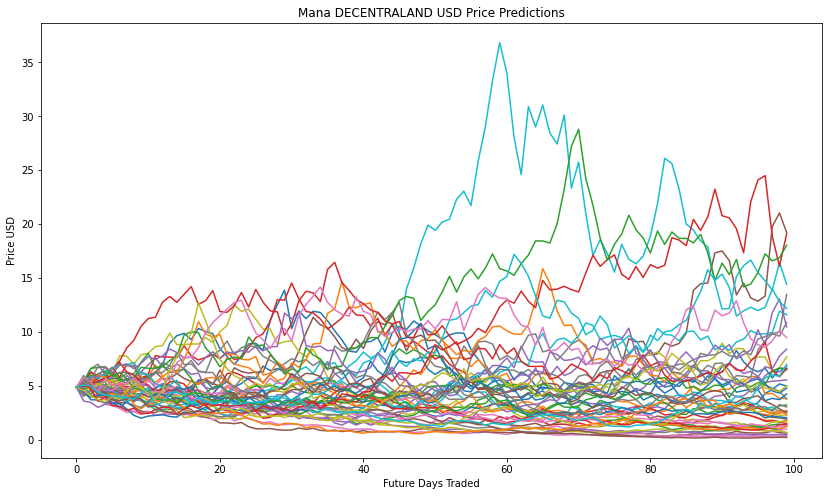

In [196]:
plt.figure(figsize=(14,8))
plt.title('Mana DECENTRALAND USD Price Predictions')
plt.xlabel('Future Days Traded')
plt.ylabel('Price USD')
plt.plot(price_list)